In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# About Data

In [3]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Data Cleaning

In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [9]:
df.drop(columns=['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

#### Removing 'RowNumber','CustomerId' because no category representation with 10000 unique values. 'Surname' are all diffrent so it's hard to categorize

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# EDA

### Credit Score

In [11]:
df['CreditScore'].unique()

array([619, 608, 502, 699, 850, 645, 822, 376, 501, 684, 528, 497, 476,
       549, 635, 616, 653, 587, 726, 732, 636, 510, 669, 846, 577, 756,
       571, 574, 411, 591, 533, 553, 520, 722, 475, 490, 804, 582, 472,
       465, 556, 834, 660, 776, 829, 637, 550, 698, 585, 788, 655, 601,
       656, 725, 511, 614, 742, 687, 555, 603, 751, 581, 735, 661, 675,
       738, 813, 657, 604, 519, 664, 678, 757, 416, 665, 777, 543, 506,
       493, 652, 750, 729, 646, 647, 808, 524, 769, 730, 515, 773, 814,
       710, 413, 623, 670, 622, 785, 605, 479, 685, 538, 562, 721, 628,
       668, 828, 674, 625, 432, 770, 758, 795, 686, 789, 589, 461, 584,
       579, 663, 682, 793, 691, 485, 650, 754, 535, 716, 539, 706, 586,
       631, 717, 800, 683, 704, 615, 667, 484, 480, 578, 512, 606, 597,
       778, 514, 525, 715, 580, 807, 521, 759, 516, 711, 618, 643, 671,
       689, 620, 676, 572, 695, 592, 567, 694, 547, 594, 673, 610, 767,
       763, 712, 703, 662, 659, 523, 772, 545, 634, 739, 771, 68

<Axes: ylabel='Density'>

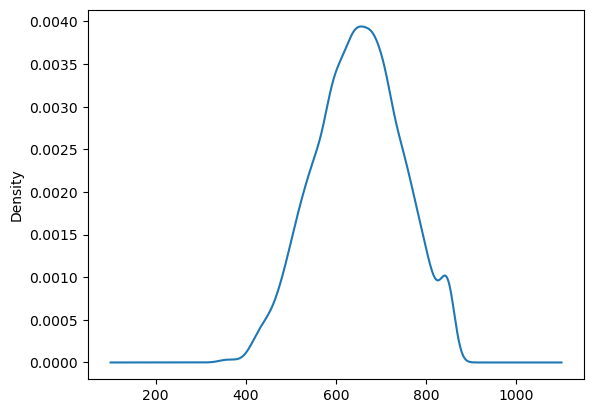

In [12]:
df['CreditScore'].plot.kde()

<Axes: >

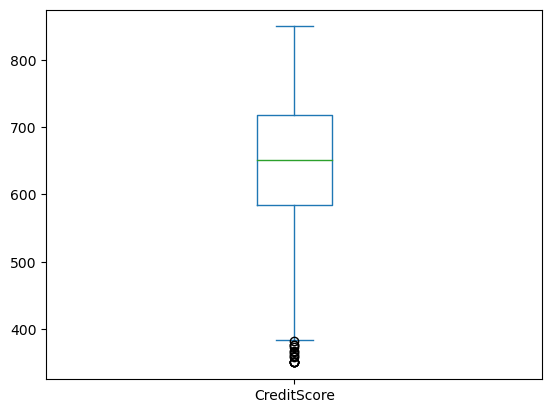

In [13]:
df['CreditScore'].plot.box()

In [14]:
df['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

max_limit: 850.0
min_limit: 432.0
--------------------------------------------------


<Axes: >

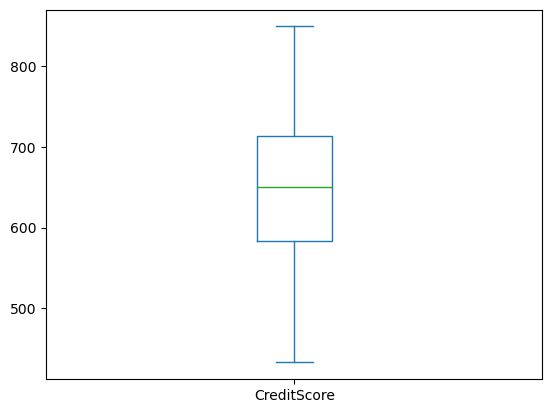

In [15]:
max_limit=df['CreditScore'].quantile(0.99)
min_limit=df['CreditScore'].quantile(0.01)
print('max_limit:',max_limit)
print('min_limit:',min_limit)
print('-'*50)
#Trimming
df=df[(df['CreditScore']>min_limit) & (df['CreditScore']<max_limit)]
df['CreditScore'].plot.box()

<Axes: ylabel='Density'>

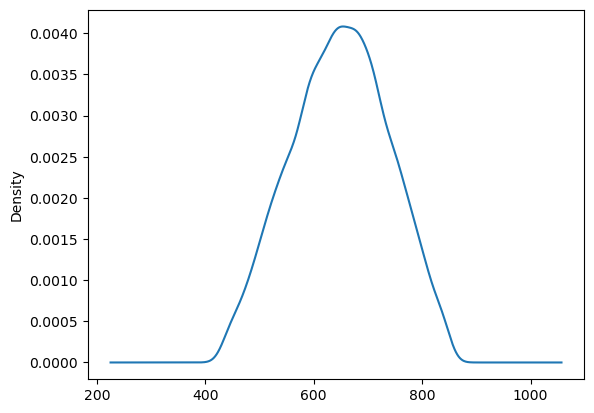

In [16]:
df['CreditScore'].plot.kde()

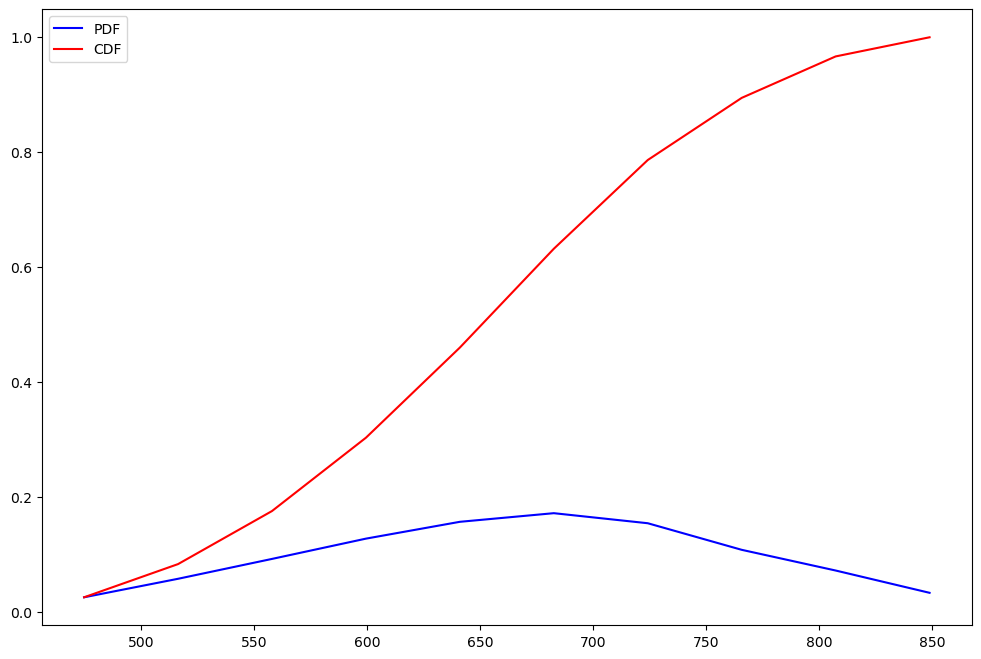

In [17]:
pdf=df.copy()
cdf=np.cumsum(df)
count, bin_count=np.histogram(df['CreditScore'],bins=10)
pdf=count/sum(count)
cdf=np.cumsum(pdf)
axes,fig=plt.subplots(figsize=[12,8])
plt.plot(bin_count[1:],pdf,'b',label='PDF',)
plt.plot(bin_count[1:],cdf,'r', label='CDF')
plt.legend();

#### Higher the credict score people have exited or some product as higher score.

## Geography

In [18]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

France     4846
Germany    2416
Spain      2401
Name: Geography, dtype: int64
--------------------------------------------------


<Axes: >

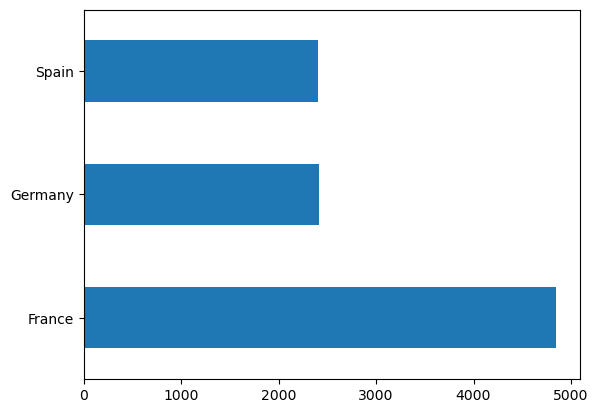

In [19]:
print(df['Geography'].value_counts())
print('-'*50)
df['Geography'].value_counts().plot.barh()

#### Most Product buyer are from France

## Gender

In [20]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

Male      5274
Female    4389
Name: Gender, dtype: int64
--------------------------------------------------


<Axes: >

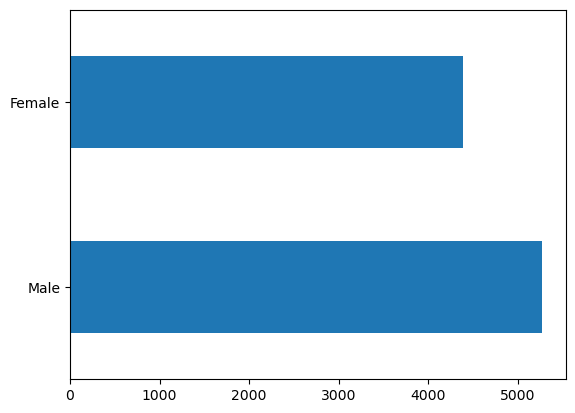

In [21]:
print(df['Gender'].value_counts())
print('-'*50)
df['Gender'].value_counts().plot.barh()

## Age

In [22]:
df['Age'].unique()

array([42, 41, 39, 44, 50, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38, 46, 36,
       43, 29, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 63, 64, 70, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83], dtype=int64)

<Axes: ylabel='Frequency'>

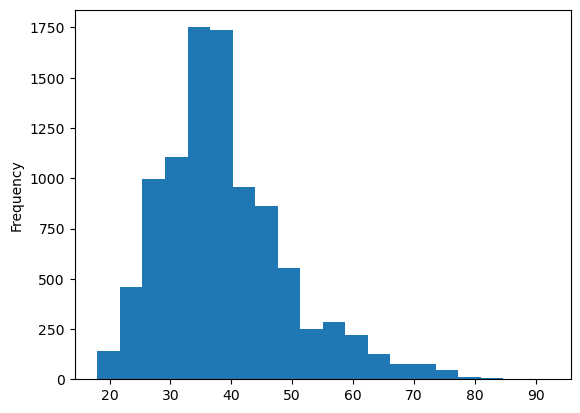

In [23]:
df['Age'].plot.hist(bins=20)

Skew :  1.0015425018696043


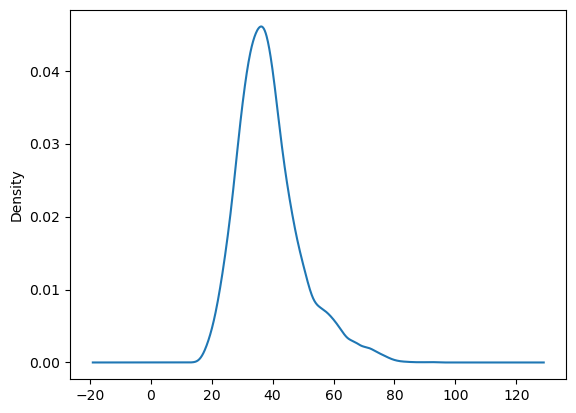

In [24]:
df['Age'].plot.kde()
print('Skew : ',df['Age'].skew())

<Axes: >

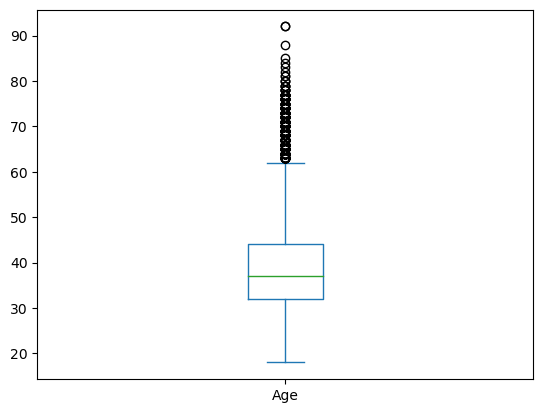

In [25]:
df['Age'].plot.box()

In [26]:
percentile25 = df["Age"].quantile(0.25)
percentile75 = df["Age"].quantile(0.75)
IQR = percentile75 - percentile25
min = percentile25 - 1.5*IQR
max = percentile75 + 1.5*IQR
df = df[(df["Age"]>min) & (df["Age"]<max)]

<Axes: >

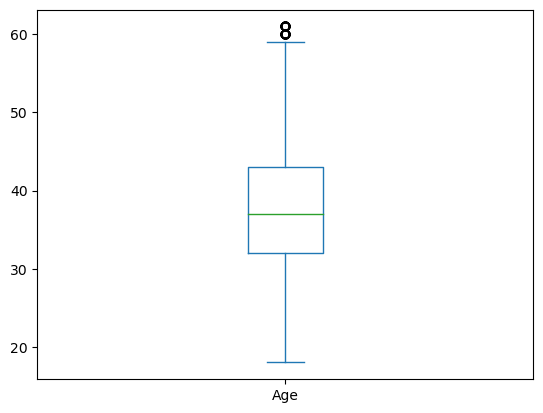

In [28]:
df['Age'].plot.box()

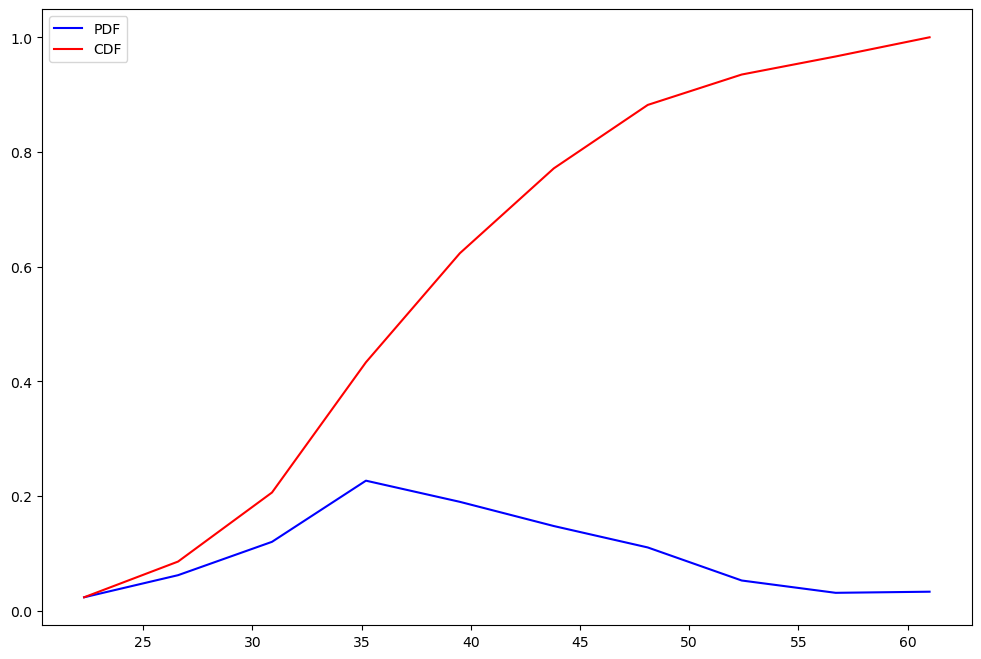

In [29]:
pdf=df.copy()
cdf=np.cumsum(df)
count, bin_count=np.histogram(df['Age'],bins=10)
pdf=count/sum(count)
cdf=np.cumsum(pdf)
axes,fig=plt.subplots(figsize=[12,8])
plt.plot(bin_count[1:],pdf,'b',label='PDF',)
plt.plot(bin_count[1:],cdf,'r', label='CDF')
plt.legend()

## Tenure

<Axes: >

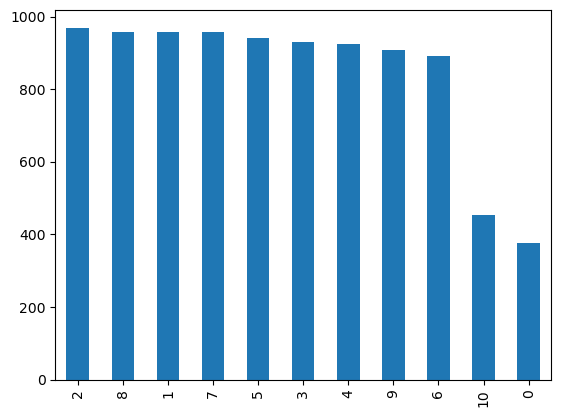

In [30]:
df.Tenure.value_counts().plot.bar()

## Balance

In [31]:
df.Balance.describe()

count      9268.000000
mean      76525.144564
std       62451.434992
min           0.000000
25%           0.000000
50%       97198.540000
75%      127665.115000
max      250898.090000
Name: Balance, dtype: float64

<Axes: >

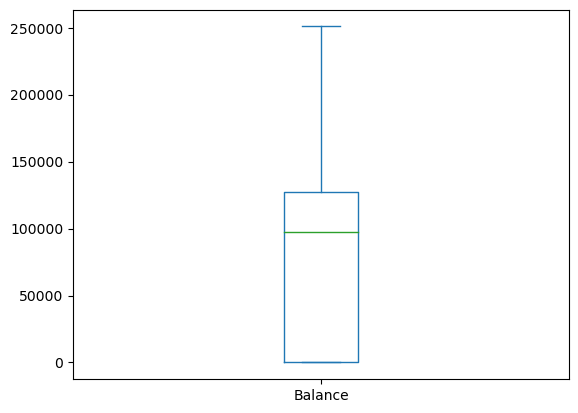

In [32]:
df.Balance.plot.box()

<Axes: ylabel='Density'>

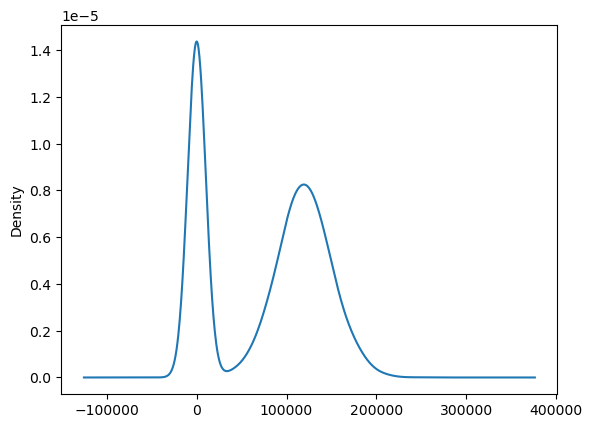

In [33]:
df.Balance.plot.kde()

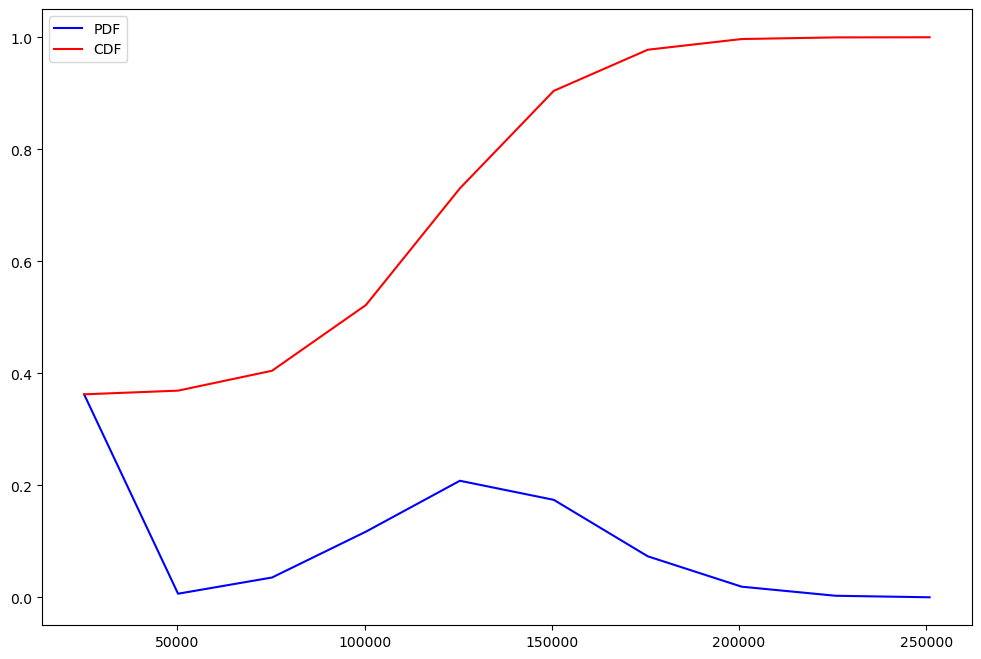

In [34]:
pdf=df.copy()
cdf=np.cumsum(df)
count, bin_count=np.histogram(df['Balance'],bins=10)
pdf=count/sum(count)
cdf=np.cumsum(pdf)
axes,fig=plt.subplots(figsize=[12,8])
plt.plot(bin_count[1:],pdf,'b',label='PDF',)
plt.plot(bin_count[1:],cdf,'r', label='CDF')
plt.legend()

## Number Of Products

In [35]:
df.NumOfProducts.unique()

array([1, 3, 2, 4], dtype=int64)

<Axes: >

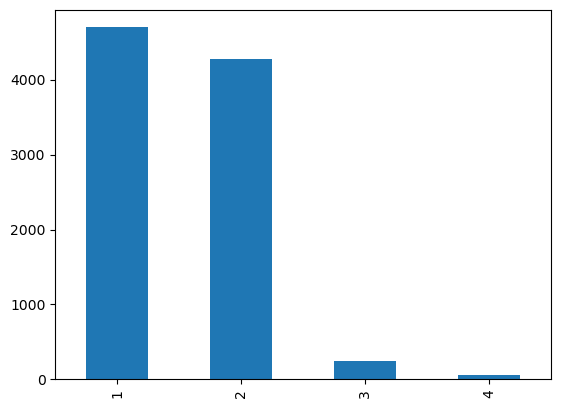

In [36]:
df.NumOfProducts.value_counts().plot.bar()

## HasCrCard

<Axes: >

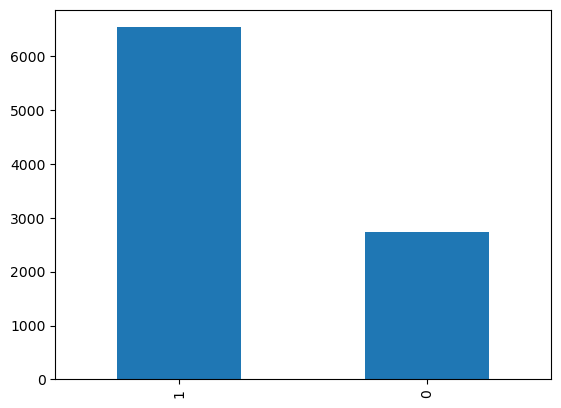

In [37]:
df.HasCrCard.value_counts().plot.bar()

## Is Active Member

<Axes: >

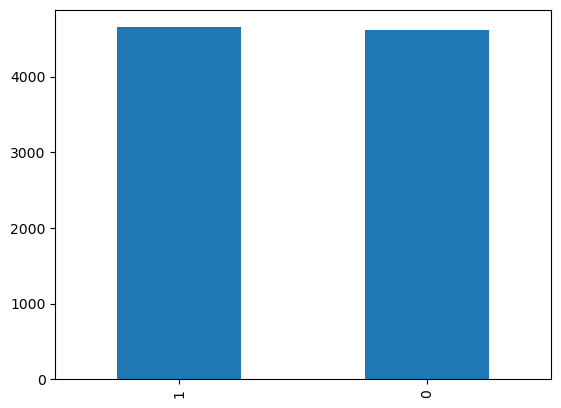

In [38]:
df.IsActiveMember.value_counts().plot.bar()

## Estimated Salary

<Axes: ylabel='Density'>

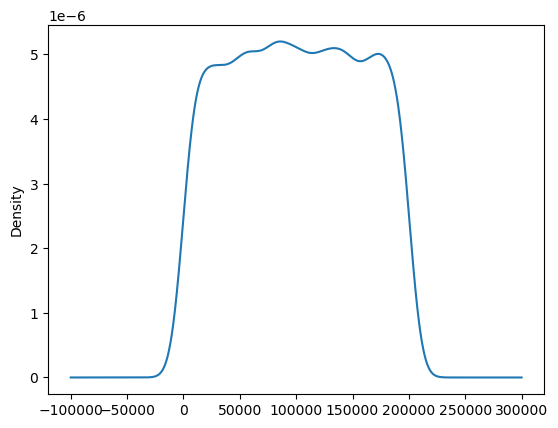

In [39]:
df.EstimatedSalary.plot.kde()

<Axes: >

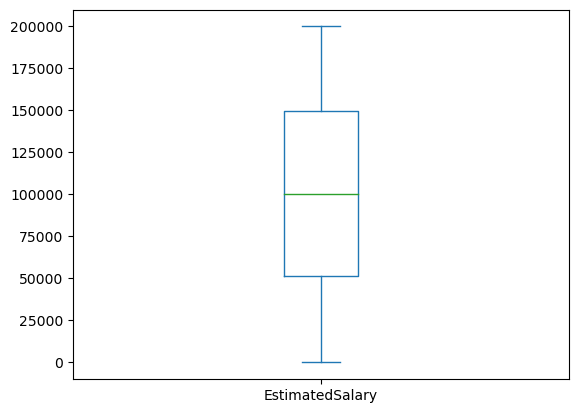

In [40]:
df.EstimatedSalary.plot.box()

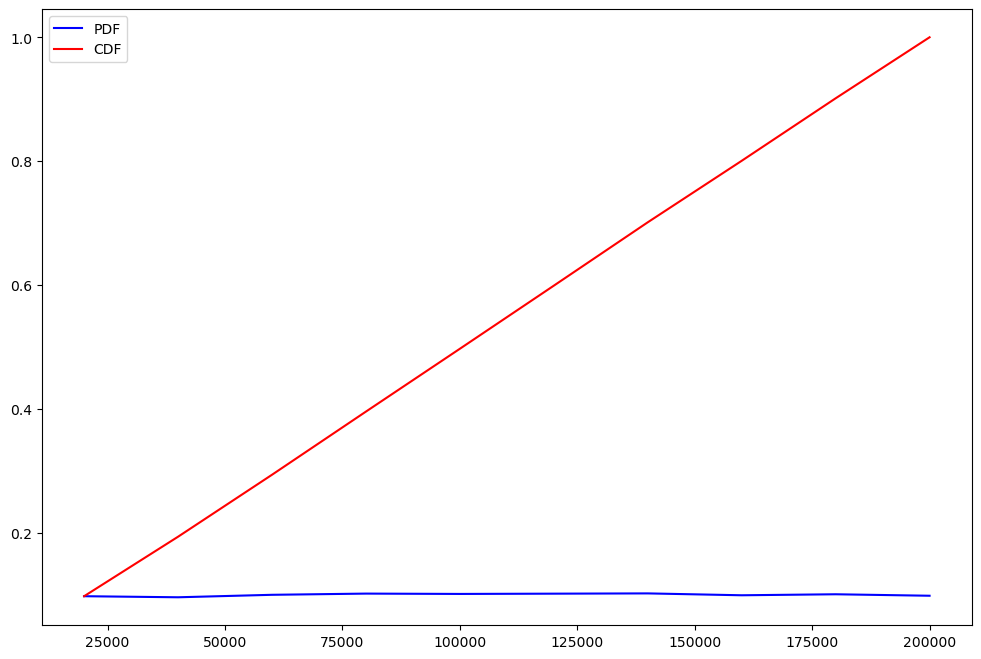

In [41]:
pdf=df.copy()
cdf=np.cumsum(df)
count, bin_count=np.histogram(df['EstimatedSalary'],bins=10)
pdf=count/sum(count)
cdf=np.cumsum(pdf)
axes,fig=plt.subplots(figsize=[12,8])
plt.plot(bin_count[1:],pdf,'b',label='PDF',)
plt.plot(bin_count[1:],cdf,'r', label='CDF')
plt.legend()

## Multivariate

In [42]:
df.corr()

C:\Users\Nikhil\AppData\Local\Temp\ipykernel_10392\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.009760,0.001386,0.004112,0.013619,0.001101,0.017182,0.000321,-0.009036
Age,-0.009760,1.000000,-0.013032,0.039767,-0.029881,-0.013311,0.017465,-0.006118,0.359031
Tenure,0.001386,-0.013032,1.000000,-0.010833,0.018890,0.021320,-0.024867,0.008963,-0.015989
Balance,0.004112,0.039767,-0.010833,1.000000,-0.305792,-0.008755,-0.007344,0.008742,0.114399
NumOfProducts,0.013619,-0.029881,0.018890,-0.305792,1.000000,0.001443,0.010950,0.012839,-0.046890
HasCrCard,0.001101,-0.013311,0.021320,-0.008755,0.001443,1.000000,-0.014099,-0.013653,-0.005813
IsActiveMember,0.017182,0.017465,-0.024867,-0.007344,0.010950,-0.014099,1.000000,-0.008577,-0.137051
EstimatedSalary,0.000321,-0.006118,0.008963,0.008742,0.012839,-0.013653,-0.008577,1.000000,0.009735
Exited,-0.009036,0.359031,-0.015989,0.114399,-0.046890,-0.005813,-0.137051,0.009735,1.000000


## Feature Scaling

In [43]:
new_df=df.copy()

In [44]:
new_df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [45]:
new_df.Geography.replace({
    'France':0,'Spain':1,'Germany':2
},inplace=True)

In [46]:
new_df.Gender.replace({
    'Female':0,'Male':1
},inplace=True)

In [47]:
new_df['Balance']=new_df.Balance.astype('int64')

In [48]:
new_df['EstimatedSalary']=new_df.EstimatedSalary.astype('int64')

In [49]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9268 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   CreditScore      9268 non-null   int64
 1   Geography        9268 non-null   int64
 2   Gender           9268 non-null   int64
 3   Age              9268 non-null   int64
 4   Tenure           9268 non-null   int64
 5   Balance          9268 non-null   int64
 6   NumOfProducts    9268 non-null   int64
 7   HasCrCard        9268 non-null   int64
 8   IsActiveMember   9268 non-null   int64
 9   EstimatedSalary  9268 non-null   int64
 10  Exited           9268 non-null   int64
dtypes: int64(11)
memory usage: 868.9 KB


In [50]:
new_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0,1,1,1,101348,1
1,608,1,0,41,1,83807,1,0,1,112542,0
2,502,0,0,42,8,159660,3,1,0,113931,1
3,699,0,0,39,1,0,2,0,0,93826,0
5,645,1,1,44,8,113755,2,1,0,149756,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0,2,1,0,96270,0
9996,516,0,1,35,10,57369,1,1,1,101699,0
9997,709,0,0,36,7,0,1,0,1,42085,1
9998,772,2,1,42,3,75075,2,1,0,92888,1


## Modeling

In [51]:
X=new_df.drop(columns='Exited')
y=new_df['Exited']

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(6209, 10) (3059, 10) (6209,) (3059,)


In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred=clf.predict(X_test)
y_pred=clf.predict(X_test)
print(y_pred)
print('-'*50)
score=accuracy_score(y_pred,y_test)
print(score)

[0 0 0 ... 0 0 0]
--------------------------------------------------
0.8290290944753187


In [55]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test, y_pred)

array([[2354,   95],
       [ 428,  182]], dtype=int64)

In [56]:
# Performance metrics
num=2319+162
deno=2319+162+80+435
accu=(num/deno)*100
accu

82.81041388518024

### Model is giving balance data with 80%

In [57]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      2782
           1       0.30      0.66      0.41       277

    accuracy                           0.83      3059
   macro avg       0.63      0.75      0.66      3059
weighted avg       0.90      0.83      0.86      3059



In [58]:
# Grid Search CV
from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}
clfs=GridSearchCV(clf,param_grid=parameter,scoring='accuracy',cv=5)
clfs.fit(X_train,y_train)
print(clfs.best_params_)
print(clfs.best_score_)

C:\Users\Nikhil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
330 fits failed out of a total of 495.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
165 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Nikhil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Nikhil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Nikhil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}
0.8218697974855351


C:\Users\Nikhil\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [      nan 0.8218698       nan       nan 0.8218698       nan       nan
 0.8218698       nan       nan 0.8218698       nan       nan 0.8218698
       nan       nan 0.8218698       nan       nan 0.8218698       nan
       nan 0.8218698       nan       nan 0.8218698       nan       nan
 0.8218698       nan       nan 0.8218698       nan       nan 0.8218698
       nan       nan 0.8218698       nan       nan 0.8218698       nan
       nan 0.8218698       nan       nan 0.8218698       nan       nan
 0.8218698       nan       nan 0.8218698       nan       nan 0.8218698
       nan       nan 0.8218698       nan       nan 0.8218698       nan
       nan 0.8218698       nan       nan 0.8218698       nan       nan
 0.8218698       nan       nan 0.8218698       nan       nan 0.8218698
       nan       nan 0.8218698       nan       nan 0.8218698       nan
    

In [59]:
y_pred=clfs.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)
print(score)

0.8290290944753187


In [60]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      2782
           1       0.30      0.66      0.41       277

    accuracy                           0.83      3059
   macro avg       0.63      0.75      0.66      3059
weighted avg       0.90      0.83      0.86      3059



## Naive bayes

In [61]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
score=accuracy_score(y_pred,y_test)
print(score)

0.8440666884602811


## KNeighborsClassifier

In [62]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_pred = neigh.predict(X_test)
ac = accuracy_score(y_test,y_pred)
print(ac)
print('-'*50)
distances, indices = neigh.kneighbors(X)
print('Indices :',indices)
print('-'*100)
print('Distances :',distances)

0.8257600523046748
--------------------------------------------------


C:\Users\Nikhil\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Indices : [[ 641 3281 5188]
 [ 282 2892 1132]
 [ 282 4621 2892]
 ...
 [ 641 5657 4314]
 [ 282 2892 1132]
 [4621 2717  282]]
----------------------------------------------------------------------------------------------------
Distances : [[101348.15492816 101348.15620183 101348.1562105 ]
 [140317.3148224  140317.508576   140317.58206927]
 [196139.68655509 196139.8189019  196139.89995725]
 ...
 [ 42089.22705299  42089.23362215  42089.23490131]
 [119433.66531777 119433.86023984 119433.95005324]
 [135629.31203895 135629.44247277 135629.50066532]]


## Decision Tree

[Text(0.5, 0.8333333333333334, 'x[3] <= 0.561\ngini = 0.323\nsamples = 6209\nvalue = [4952, 1257]'),
 Text(0.25, 0.5, 'x[6] <= 1.675\ngini = 0.207\nsamples = 4585\nvalue = [4047, 538]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.185\nsamples = 4488\nvalue = [4024, 464]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.362\nsamples = 97\nvalue = [23, 74]'),
 Text(0.75, 0.5, 'x[6] <= 1.675\ngini = 0.493\nsamples = 1624\nvalue = [905, 719]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.483\nsamples = 1527\nvalue = [904, 623]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.02\nsamples = 97\nvalue = [1, 96]')]

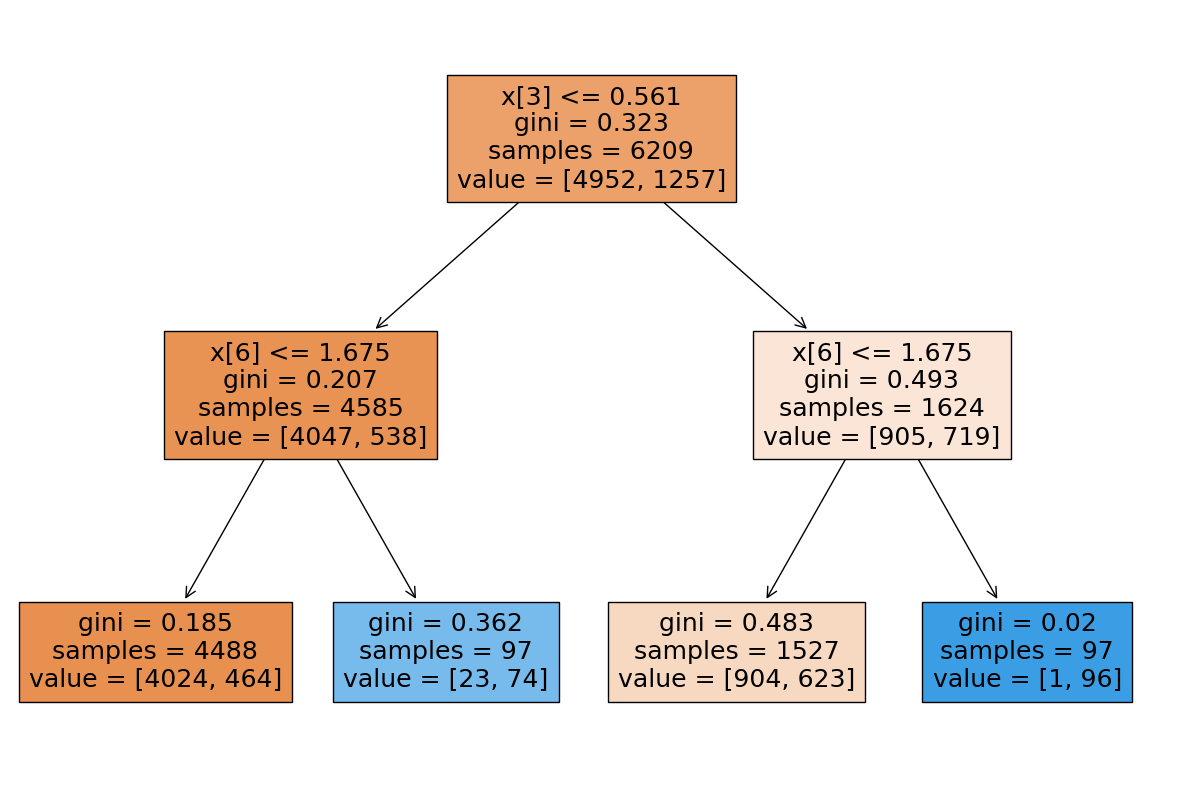

In [63]:
from sklearn.tree import DecisionTreeClassifier
treemodel=DecisionTreeClassifier(max_depth=2)
treemodel.fit(X_train,y_train)
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=True)

In [64]:
y_pred=treemodel.predict(X_test)
score=accuracy_score(y_pred,y_test)
print(score)
print('-'*100)
print(classification_report(y_pred,y_test))

0.823471722785224
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.82      0.90      2953
           1       0.14      0.83      0.25       106

    accuracy                           0.82      3059
   macro avg       0.57      0.83      0.57      3059
weighted avg       0.96      0.82      0.88      3059



## Random Forest Classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train, y_train)
y_pred=clf.predict(X_test)
score=accuracy_score(y_pred,y_test)
print(score)
print('-'*100)
print(classification_report(y_pred,y_test))

0.8195488721804511
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.82      0.90      3001
           1       0.10      1.00      0.17        58

    accuracy                           0.82      3059
   macro avg       0.55      0.91      0.54      3059
weighted avg       0.98      0.82      0.88      3059



In [66]:
pd.DataFrame(y_pred).replace({
    0:'Not Exited',
    1:'Exited'
})

,0
0,Not Exited
1,Not Exited
2,Not Exited
3,Not Exited
4,Not Exited
...,...
3054,Not Exited
3055,Not Exited
3056,Not Exited
3057,Not Exited
